In [ ]:
# Copyright 2024 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# [Name of the Notebook]

[Change the link]

<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/GoogleCloudPlatform/generative-ai/blob/main/gemini/getting-started/intro_gemini_1_5_flash.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Google Colaboratory logo"><br> Open in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https:%2F%2Fraw.githubusercontent.com%2FGoogleCloudPlatform%2Fgenerative-ai%2Fmain%2Fgemini%2Fgetting-started%2Fintro_gemini_1_5_flash.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo"><br> Open in Colab Enterprise
    </a>
  </td>    
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/GoogleCloudPlatform/generative-ai/main/gemini/getting-started/intro_gemini_1_5_flash.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo"><br> Open in Workbench
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/getting-started/intro_gemini_1_5_flash.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
</table>


## Overview

[add overview]

[add what you learned in previous notebook and link] - skip if its first


[Context of this notebook compared to overall idea]

## Getting Started

### Install Dependencies


In [ ]:
! pip3 install --upgrade --user --quiet google-cloud-aiplatform rich

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 17.9 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


### Restart runtime

To use the newly installed packages in this Jupyter runtime, you must restart the runtime. You can do this by running the cell below, which restarts the current kernel.

In [ ]:
import sys

if "google.colab" in sys.modules:
    import IPython

    app = IPython.Application.instance()
    app.kernel.do_shutdown(True)

<div class="alert alert-block alert-warning">
<b>⚠️ The kernel is going to restart. Please wait until it is finished before continuing to the next step. ⚠️</b>
</div>


### Authenticate your notebook environment (Colab only)

If you are running this notebook on Google Colab, run the cell below to authenticate your environment.


In [ ]:
import sys

if "google.colab" in sys.modules:
    from google.colab import auth

    auth.authenticate_user()

### Set Google Cloud project information and initialize Vertex AI SDK

To get started using Vertex AI, you must have an existing Google Cloud project and [enable the Vertex AI API](https://console.cloud.google.com/flows/enableapi?apiid=aiplatform.googleapis.com).

Learn more about [setting up a project and a development environment](https://cloud.google.com/vertex-ai/docs/start/cloud-environment).

In [ ]:
# Define project information
PROJECT_ID = "lavi-llm-experiment"  # @param {type:"string"}
LOCATION = "us-central1"  # @param {type:"string"}
BUCKET_NAME = "mlops-for-genai" # @param {type:"string"}
# Initialize Vertex AI
import vertexai

vertexai.init(project=PROJECT_ID, location=LOCATION)

# Initialize cloud storage
from google.cloud import storage

storage_client = storage.Client(project=PROJECT_ID)
bucket = storage_client.bucket(BUCKET_NAME)

### Import libraries


In [ ]:
import IPython.display
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
from vertexai.generative_models import (
    GenerationConfig,
    GenerativeModel,
    HarmBlockThreshold,
    HarmCategory,
    Part,
)
import seaborn as sns
import matplotlib.pyplot as plt
from rich.markdown import Markdown as rich_Markdown
from rich import print as rich_print
import nltk
from nltk import ngrams
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from wordcloud import STOPWORDS, WordCloud
from collections import Counter

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### Load the models

To learn more about all [Gemini API models on Vertex AI](https://cloud.google.com/vertex-ai/generative-ai/docs/learn/models#gemini-models).


In [ ]:
MODEL_ID_PRO = "gemini-1.5-pro-001"  # @param {type:"string"}
MODEL_ID_FLASH = "gemini-1.5-flash-001" # @param {type:"string"}

model_pro = GenerativeModel(MODEL_ID_PRO)
model_flash = GenerativeModel(MODEL_ID_FLASH)

### Add data path

In [ ]:
prototype_data = "multimodal-finanace-qa/data/unstructured/prototype/"  # @param {type:"string"}
production_data = "multimodal-finanace-qa/data/unstructured/production/"  # @param {type:"string"}

## Training Data




this assumes that you have done your data generation, review and modification process. The data that we will use is the end state after going through all the above.

In [ ]:
training_data = pd.read_csv("gs://mlops-for-genai/multimodal-finanace-qa/data/structured/training_data.csv")

In [ ]:
training_data.head()

,row,question,answer,question_type,question_type_description,audio_citation,text_citation,video_citation,source_file,file_type
0,1.0,Given Alphabet's interest in sustainability an...,"While Alphabet focuses on sustainable value, i...",Ethical/Moral Questions,High,"[{'file_name': 'episode5.mp3', 'timestamp_rang...",[{'file_name': '2020_Q4_Earnings_Transcript.pd...,[{'file_name': 'The capabilities of multimodal...,['gs://mlops-for-genai/multimodal-finanace-qa/...,"['pdf', 'mp3', 'mp4']"
1,2.0,How is Google using AI to optimize advertiseme...,Google has introduced experimental conversatio...,Synthesis Questions,Moderate,[{'file_name': 'Alphabet_2023_Q1_Earnings_Call...,[],[],['gs://mlops-for-genai/multimodal-finanace-qa/...,"['mp3', 'pdf', 'mp3', 'mp4']"
2,3.0,What is the prediction for hardware revenue gr...,Hardware revenue growth will be negatively imp...,Prediction Questions,High,[{'file_name': 'Alphabet 2023 Q2 Earnings Call...,[],[],['gs://mlops-for-genai/multimodal-finanace-qa/...,['mp3']
3,4.0,"In 2021, what did Alphabet launch specifically...","In 2021, Alphabet launched a new phone for Ind...",Factual Extraction Questions,Low to Moderate,[],[{'file_name': '2021-alphabet-annual-report.pd...,[],['gs://mlops-for-genai/multimodal-finanace-qa/...,['pdf']
4,5.0,How many shares of each class of Alphabet stoc...,As per Alphabet's Form 10-Q filing for the qua...,Synthesis Questions,Moderate,[],"[{'file_name': '20220726-alphabet-10q.pdf', 'p...",[],['gs://mlops-for-genai/multimodal-finanace-qa/...,['pdf']


In [ ]:
index = 8

print("*******The question: *******\n")
rich_print(training_data['question'][index])
print("\n*******The answer:*******")
rich_Markdown(training_data['answer'][index])
print("\n*******The question type: *******\n", training_data['question_type'][index])
print("*******The question type description: *******\n", training_data['question_type_description'][index])
print("*******Text citation: *******\n",)
rich_print(training_data['text_citation'][index])
print("*******Audio citation: *******\n",)
rich_print(training_data['audio_citation'][index])
print("*******Video citation: *******\n",)
rich_print(training_data['video_citation'][index])

*******The question: *******



Considering Alphabet's 2021 financial performance and the advancements in AI, how might these factors, coupled with
the broader discussion on AI's societal impact, influence the future outlook for Alphabet's stock price?


*******The answer:*******


While the provided information primarily focuses on Alphabet's past investments and current financial standing, it 
indirectly sheds light on a possible trajectory for its stock price. The annual report indicates strong revenue    
growth, particularly in retail, along with successful integration of artificial intelligence across products like  
Google Search and the new Pixel phones. The Q3 earnings transcript confirms this success, noting an increase in    
revenues driven by Google Services and Google Cloud. The podcast, however, reveals concerns surrounding the        
potential for artificial intelligence to be misused in elections and the challenges it poses for jobs. This        
suggests that while Alphabet's AI advancements may drive short-term stock growth, long-term predictions depend on  
navigating ethical and societal challenges associated with AI. Without concrete information on how these challenges
will be addressed, it's difficult to provide a definitive outlook.


*******The question type: *******
 Prediction Questions
*******The question type description: *******
 High
*******Text citation: *******



[{'file_name': '2021_Q3_Earnings_Transcript.pdf', 'page_number': '5', 'text': "We're pleased with the growth in 
Google Services revenues in the third quarter. Year-on-year performance was driven by broad-based strength in 
advertiser spend. Consumer online activity also remained elevated."}, {'file_name': 
'2021-alphabet-annual-report.pdf', 'page_number': '1', 'text': 'Across the company, investments in Al and machine 
learning are increasingly driving many of our latest innovations and have enabled us to build products that are 
smarter and more helpful.'}, {'file_name': '2021-alphabet-annual-report.pdf', 'page_number': '16', 'text': 'In the 
third quarter, Retail was again by far the largest contributor to year-on-year growth of our Ads business.'}, 
{'file_name': '2021-alphabet-annual-report.pdf', 'page_number': '3', 'text': 'The recent launch of Tensor and Pixel
6 is a great example of that.'}]

*******Audio citation: *******



[{'file_name': 'episode4.mp3', 'timestamp_range': '00:16:20-00:17:10', 'transcript': "the big concern with AI 
particularly large language models and this big year so this huge year where there's going to be elections in India
Pakistan Bangladesh Mexico the European Union Russia UK US"}, {'file_name': 'episode4.mp3', 'timestamp_range': 
'01:03:10-01:04:00', 'transcript': "What does one do whether in Kenya or the UK and there's something slightly 
misleading about the idea that we just re-skill everybody?"}]

*******Video citation: *******



[]

In [ ]:
# Calculate word counts for questions and answers
training_data['word_count_question'] = training_data['question'].apply(lambda x: len(str(x).split()))
training_data['word_count_answer'] = training_data['answer'].apply(lambda x: len(str(x).split()))
training_data['word_count_text_citation'] = training_data['text_citation'].apply(lambda x: len(str(x).split()))
training_data['word_count_audio_citation'] = training_data['audio_citation'].apply(lambda x: len(str(x).split()))
training_data['word_count_video_citation'] = training_data['video_citation'].apply(lambda x: len(str(x).split()))

In [ ]:
training_data.head(2)

,row,question,answer,question_type,question_type_description,audio_citation,text_citation,video_citation,source_file,file_type,word_count_question,word_count_answer,word_count_text_citation,word_count_audio_citation,word_count_video_citation
0,1.0,Given Alphabet's interest in sustainability an...,"While Alphabet focuses on sustainable value, i...",Ethical/Moral Questions,High,"[{'file_name': 'episode5.mp3', 'timestamp_rang...",[{'file_name': '2020_Q4_Earnings_Transcript.pd...,[{'file_name': 'The capabilities of multimodal...,['gs://mlops-for-genai/multimodal-finanace-qa/...,"['pdf', 'mp3', 'mp4']",25,58,378,4115,889
1,2.0,How is Google using AI to optimize advertiseme...,Google has introduced experimental conversatio...,Synthesis Questions,Moderate,[{'file_name': 'Alphabet_2023_Q1_Earnings_Call...,[],[],['gs://mlops-for-genai/multimodal-finanace-qa/...,"['mp3', 'pdf', 'mp3', 'mp4']",23,58,1,117,1


<Axes: xlabel='question_type'>

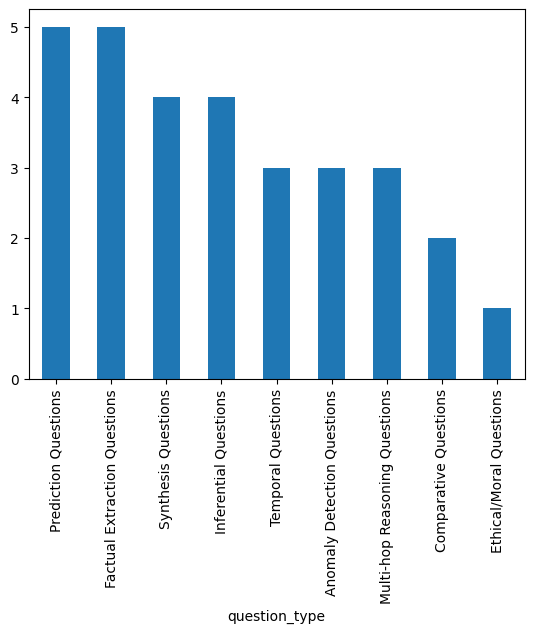

In [ ]:
training_data['question_type'].value_counts().plot(kind='bar')

<Axes: xlabel='question_type_description'>

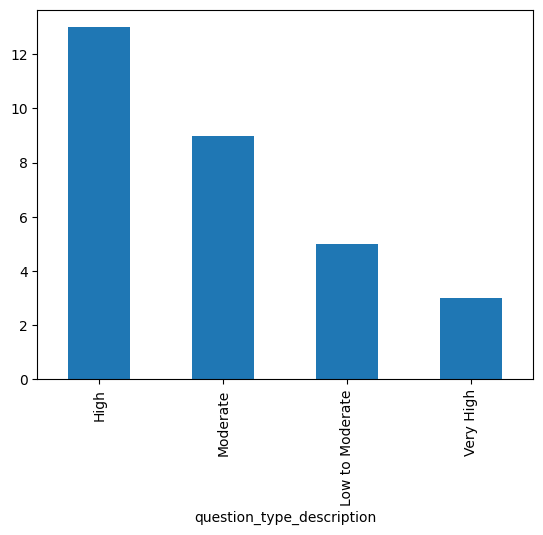

In [ ]:
training_data['question_type_description'].value_counts().plot(kind='bar')

<Axes: xlabel='word_count_question', ylabel='word_count_answer'>

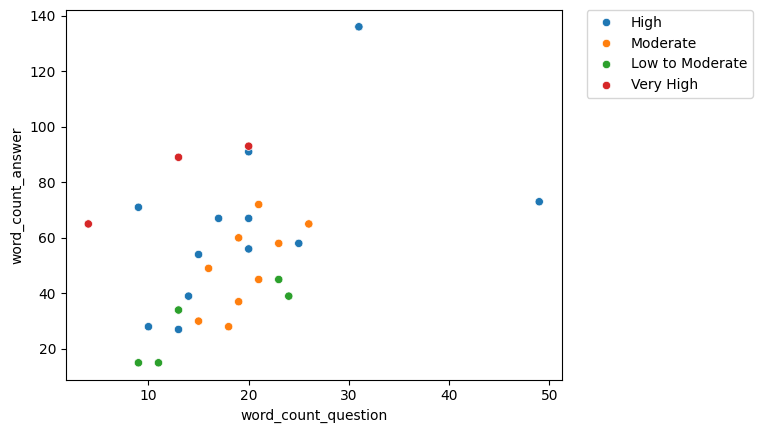

In [ ]:
sns.scatterplot(data=training_data, x="word_count_question",
                y="word_count_answer", hue="question_type_description")

# Move the legend outside the plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

<Axes: xlabel='word_count_question', ylabel='word_count_answer'>

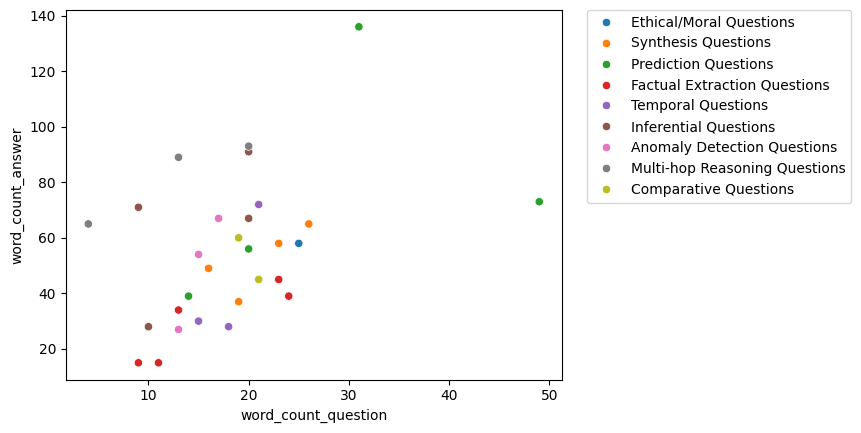

In [ ]:
sns.scatterplot(data=training_data, x="word_count_question",
                y="word_count_answer", hue="question_type")

# Move the legend outside the plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

<Axes: xlabel='word_count_answer', ylabel='word_count_text_citation'>

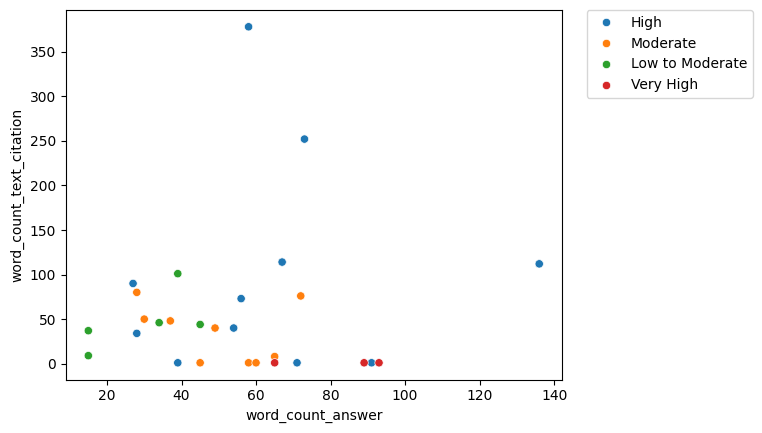

In [ ]:
sns.scatterplot(data=training_data, x="word_count_answer",
                y="word_count_text_citation", hue="question_type_description")

# Move the legend outside the plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

<Axes: xlabel='word_count_answer', ylabel='word_count_audio_citation'>

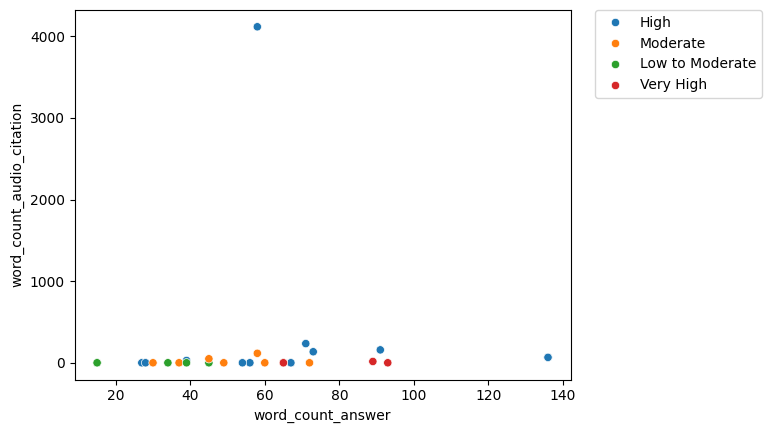

In [ ]:
sns.scatterplot(data=training_data, x="word_count_answer",
                y="word_count_audio_citation", hue="question_type_description")

# Move the legend outside the plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

<Axes: xlabel='word_count_answer', ylabel='word_count_video_citation'>

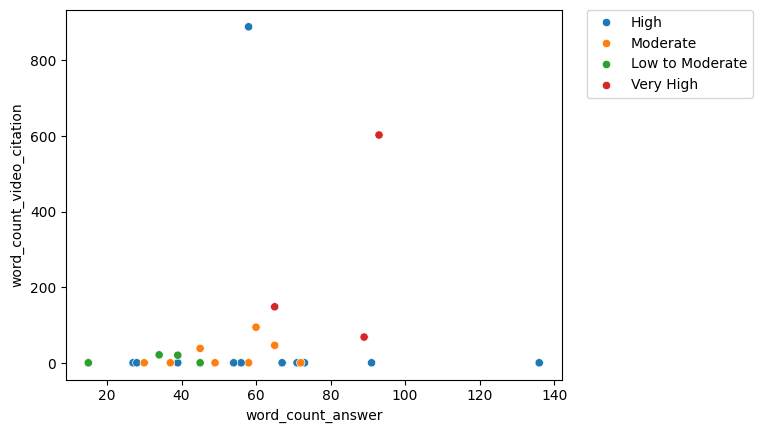

In [ ]:
sns.scatterplot(data=training_data, x="word_count_answer",
                y="word_count_video_citation", hue="question_type_description")

# Move the legend outside the plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

In [ ]:
# Function to determine citation type
def get_citation_type(row):
    citation_types = []
    if row['text_citation'] != '[]':
        citation_types.append('text')
    if row['audio_citation'] != '[]':
        citation_types.append('audio')
    if row['video_citation'] != '[]':
        citation_types.append('video')

    if len(citation_types) == 1:
        return f"{citation_types[0]}_only"
    elif len(citation_types) == 2:
        return f"{citation_types[0]}_{citation_types[1]}"
    elif len(citation_types) == 3:
        return "text_audio_video"
    else:
        return "none"  # Should not happen based on the problem description

# Apply the function to create a new column
training_data['citation_mapping'] = training_data.apply(get_citation_type, axis=1)

# Count the occurrences of each mapping
citation_counts = training_data['citation_mapping'].value_counts()

Text(0.5, 0, 'Citation Mapping')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Distribution of Citation Mappings')

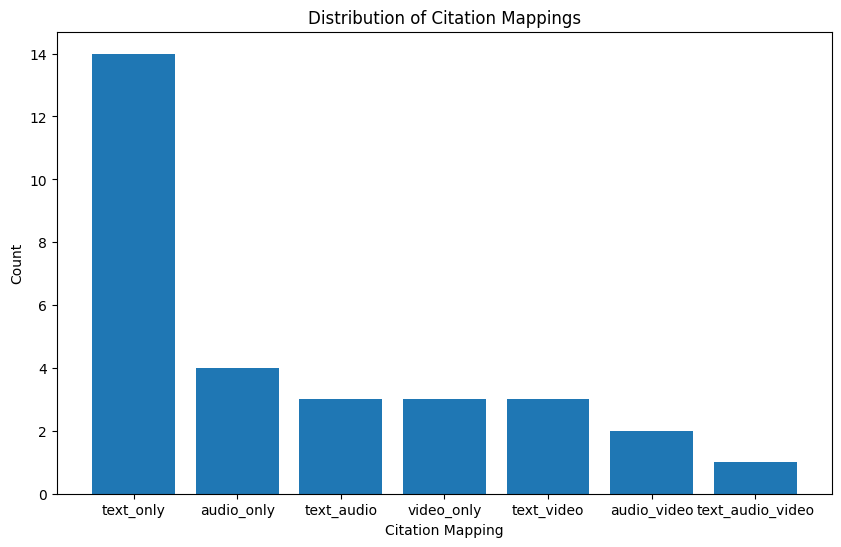

In [ ]:
# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust figsize as needed

# Plot the bars
bars = ax.bar(citation_counts.index, citation_counts.values)

# Add labels, title, etc.
ax.set_xlabel('Citation Mapping')
ax.set_ylabel('Count')
ax.set_title('Distribution of Citation Mappings')

# Show the plot
plt.show()

<Axes: xlabel='word_count_question', ylabel='word_count_answer'>

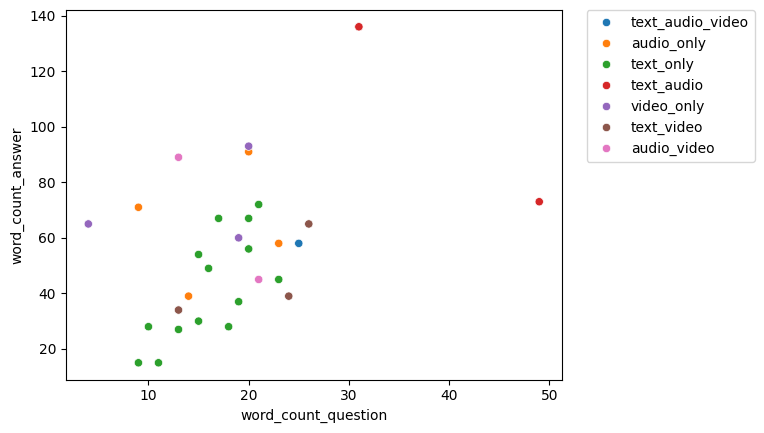

In [ ]:
sns.scatterplot(data=training_data, x="word_count_question",
                y="word_count_answer", hue="citation_mapping")

# Move the legend outside the plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

In [ ]:
training_data.head(2)

,row,question,answer,question_type,question_type_description,audio_citation,text_citation,video_citation,source_file,file_type,word_count_question,word_count_answer,word_count_text_citation,word_count_audio_citation,word_count_video_citation,citation_mapping
0,1.0,Given Alphabet's interest in sustainability an...,"While Alphabet focuses on sustainable value, i...",Ethical/Moral Questions,High,"[{'file_name': 'episode5.mp3', 'timestamp_rang...",[{'file_name': '2020_Q4_Earnings_Transcript.pd...,[{'file_name': 'The capabilities of multimodal...,['gs://mlops-for-genai/multimodal-finanace-qa/...,"['pdf', 'mp3', 'mp4']",25,58,378,4115,889,text_audio_video
1,2.0,How is Google using AI to optimize advertiseme...,Google has introduced experimental conversatio...,Synthesis Questions,Moderate,[{'file_name': 'Alphabet_2023_Q1_Earnings_Call...,[],[],['gs://mlops-for-genai/multimodal-finanace-qa/...,"['mp3', 'pdf', 'mp3', 'mp4']",23,58,1,117,1,audio_only


In [ ]:
#@title Wordcloud Helper Functions

def create_wordcloud_with_ngrams(text, ngram_range=(1, 1), stopwords=set(STOPWORDS), max_words=100):
    """
    Creates a word cloud from the given text, using n-grams within the specified range.
    N-grams with n > 1 are joined with underscores for better visualization.

    Args:
        text: The input text string.
        ngram_range: Tuple defining the n-gram range (min_n, max_n). Default is (1, 1) for single words.
        stopwords: Set of stopwords to exclude. Default is the set from WordCloud.STOPWORDS.
        max_words: Maximum number of words to include in the word cloud. Default is 100.
    """

    # Tokenize text and apply n-grams
    words = text.lower().split()
    filtered_words = [word for word in words if word not in stopwords]
    all_ngrams = []
    for n in range(ngram_range[0], ngram_range[1] + 1):
        all_ngrams.extend(ngrams(filtered_words, n))

    # Count n-gram frequencies (convert ngrams to strings and join with underscores)
    ngram_counts = Counter()  # Create an empty Counter
    for ngram in all_ngrams:
        if len(ngram) > 1:
            ngram_str = "_".join(ngram)  # Join with underscores if n-gram has more than one word
        else:
            ngram_str = ngram[0]        # Keep single word as is
        ngram_counts[ngram_str] += 1  # Increment the count for the ngram string

    # Generate word cloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color="white",
        stopwords=stopwords,
        min_font_size=10,
        max_words=max_words,
        collocations=False
    ).generate_from_frequencies(ngram_counts)

    # Display the generated image
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

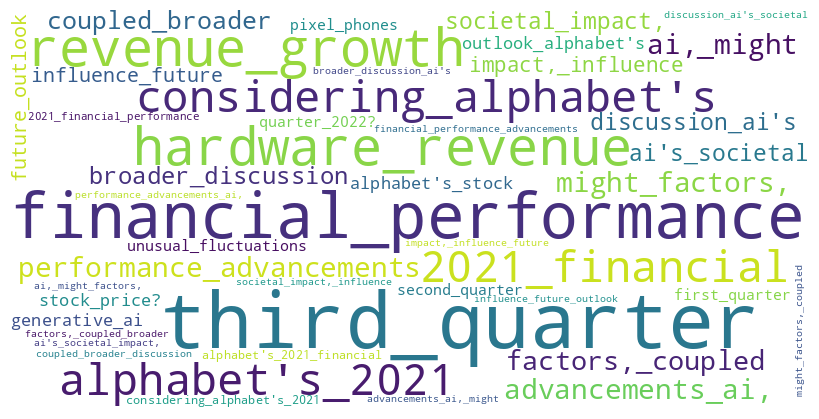

In [ ]:
create_wordcloud_with_ngrams(' '.join(training_data['question']),
                             ngram_range=(2, 3))  # bigrams, and trigrams

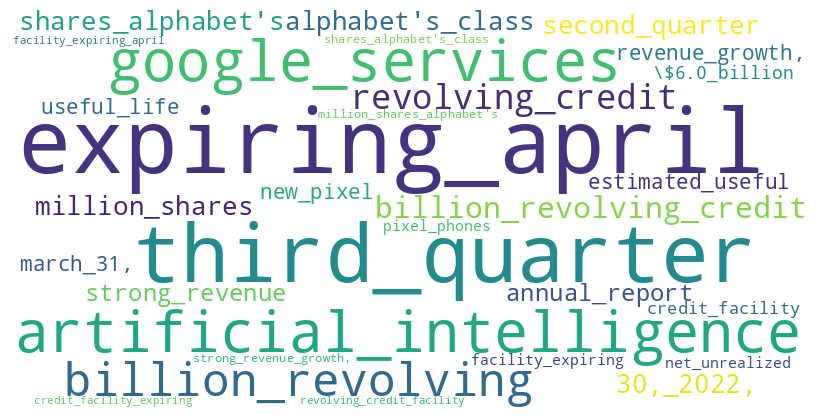

In [ ]:
create_wordcloud_with_ngrams(' '.join(training_data['answer']),
                             ngram_range=(2, 3))  # bigrams, and trigrams

## Trainig-Test Split

In [ ]:
data = training_data[['question', 'answer', 'question_type',
       'question_type_description', 'audio_citation', 'text_citation',
       'video_citation']]

In [ ]:
data.head(2)

,question,answer,question_type,question_type_description,audio_citation,text_citation,video_citation
0,Given Alphabet's interest in sustainability an...,"While Alphabet focuses on sustainable value, i...",Ethical/Moral Questions,High,"[{'file_name': 'episode5.mp3', 'timestamp_rang...",[{'file_name': '2020_Q4_Earnings_Transcript.pd...,[{'file_name': 'The capabilities of multimodal...
1,How is Google using AI to optimize advertiseme...,Google has introduced experimental conversatio...,Synthesis Questions,Moderate,[{'file_name': 'Alphabet_2023_Q1_Earnings_Call...,[],[]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

def stratified_category_split(Data, category_column, train_size=0.7, random_state=None):
    """
    Performs a train-test split ensuring category representation in both sets.

    Args:
        Data: The DataFrame containing your data.
        category_column: The column name representing the categories.
        train_size: The proportion of data to include in the training set.
        random_state: Seed for reproducibility.

    Returns:
        train_split, test_split: The resulting DataFrames.
    """

    # Ensure minimum 1 sample per category in test set
    min_test_samples_per_category = 1

    # Get category distribution
    category_counts = Data[category_column].value_counts()

    # Skip categories with less than 2 samples
    category_counts = category_counts[category_counts >= 2]

    # Calculate desired train/test samples per category
    desired_train_samples = (category_counts * train_size).astype(int)
    desired_test_samples = (category_counts - desired_train_samples).astype(int)

    # Adjust if test samples fall below minimum
    for category, test_count in desired_test_samples.items():
        if test_count < min_test_samples_per_category:
            desired_test_samples[category] = min_test_samples_per_category
            desired_train_samples[category] -= (min_test_samples_per_category - test_count)

    # Initialize train/test sets
    train_split = pd.DataFrame()
    test_split = pd.DataFrame()

    # Stratified sampling per category
    for category, count in category_counts.items():
        category_data = Data[Data[category_column] == category]
        train_category, test_category = train_test_split(
            category_data,
            train_size=desired_train_samples[category] / count,
            random_state=random_state
        )
        train_split = pd.concat([train_split, train_category])
        test_split = pd.concat([test_split, test_category])

    return train_split, test_split

In [ ]:
train_data, test_data = stratified_category_split(data, 'question_type')

In [ ]:
print("Total rows in train test: ", len(train_data))
print("Total rows in test test: ", len(test_data))

Total rows in train test:  17
Total rows in test test:  12


<Axes: xlabel='question_type'>

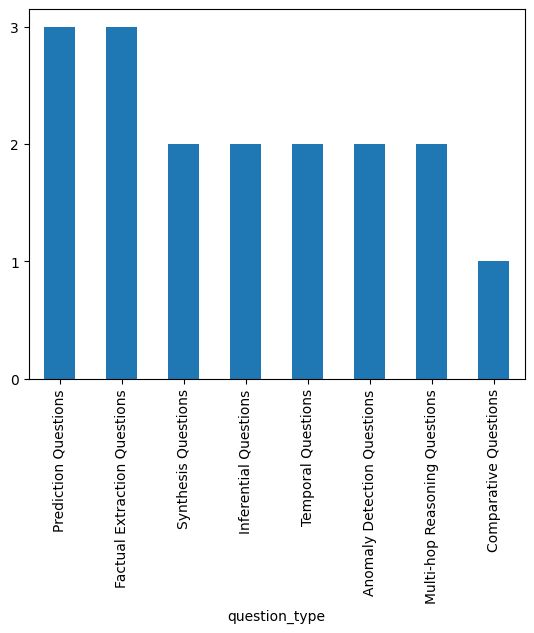

In [ ]:
train_data['question_type'].value_counts().plot(kind='bar')
# Make the count axis discrete
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))

<Axes: xlabel='question_type'>

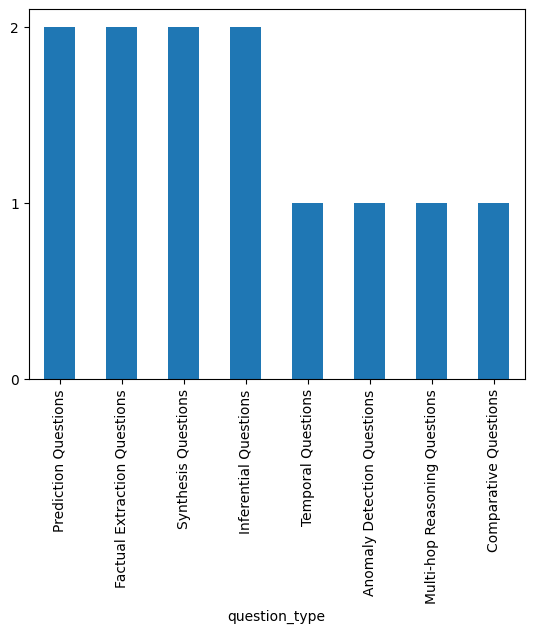

In [ ]:
test_data['question_type'].value_counts().plot(kind='bar')
# Make the count axis discrete
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))

## [Optional] Delete Resources [if not used further]

[add conclusions & Next Steps]

## Conclusion

[add conclusions & Next Steps]